In [9]:
import pandas as pd
import yfinance as yf
import datetime
import numpy as np
import seaborn as sns
from datetime import date, timedelta
from sklearn.model_selection import train_test_split
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('NFLX', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())

        Date      Open      High       Low     Close  Adj Close    Volume
0 2009-07-14  6.061429  6.221429  5.971429  6.185714   6.185714  13967800
1 2009-07-15  6.258571  6.345714  6.187143  6.344286   6.344286   9424800
2 2009-07-16  6.257143  6.324286  6.161429  6.304286   6.304286   8621900
3 2009-07-17  6.302857  6.375714  6.248571  6.305714   6.305714   8306200
4 2009-07-20  6.358571  6.425714  6.232857  6.402857   6.402857   9681000


In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python39\python.exe -m pip install --upgrade pip' command.


In [8]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3442,2023-03-15,292.510010,306.309998,292.279999,303.790009,303.790009,9215300
3443,2023-03-16,304.750000,316.600006,301.709991,310.059998,310.059998,7903700
3444,2023-03-17,310.059998,310.760010,300.000000,303.500000,303.500000,6912100
3445,2023-03-20,299.790009,307.500000,296.000000,305.130005,305.130005,5113400
3446,2023-03-21,306.320007,307.920013,300.429993,305.790009,305.790009,4876900


<AxesSubplot: xlabel='Date', ylabel='Close'>

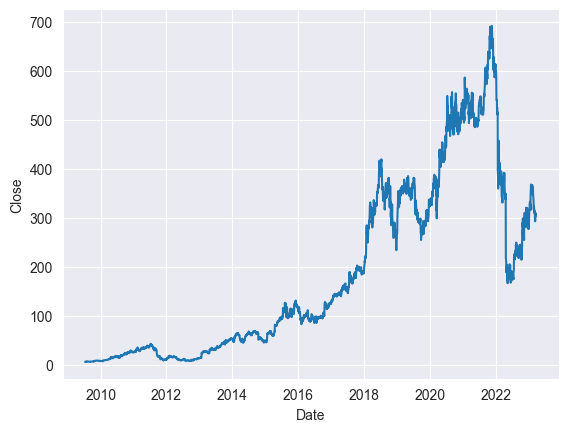

In [13]:
sns.set_style("darkgrid")

sns.lineplot(data=data, x="Date", y="Close")


In [16]:
co=data.corr()
print(co['Close'].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
High         0.999805
Low          0.999790
Open         0.999559
Volume      -0.446079
Name: Close, dtype: float64


C:\Users\Dev Atul Patel\AppData\Local\Temp\ipykernel_19404\376260124.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  co=data.corr()


In [21]:
#

In [22]:
#

,Date,Open,High,Low,Adj Close,Volume
0,2009-07-13,5.714286,6.152857,5.694286,6.027143,29690500
1,2009-07-14,6.061429,6.221429,5.971429,6.185714,13967800
2,2009-07-15,6.258571,6.345714,6.187143,6.344286,9424800
3,2009-07-16,6.257143,6.324286,6.161429,6.304286,8621900
4,2009-07-17,6.302857,6.375714,6.248571,6.305714,8306200


In [4]:
x = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=41)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [7]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(20))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 20)                1300      
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 117,289
Trainable params: 117,289
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=6)

Epoch 1/6
2757/2757 [==============================] - 28s 8ms/step - loss: 7469.2334
Epoch 2/6
2757/2757 [==============================] - 23s 9ms/step - loss: 663.3700
Epoch 3/6
2757/2757 [==============================] - 23s 8ms/step - loss: 539.0595
Epoch 4/6
2757/2757 [==============================] - 24s 9ms/step - loss: 641.3315
Epoch 5/6
2757/2757 [==============================] - 23s 8ms/step - loss: 208.6935
Epoch 6/6
2757/2757 [==============================] - 26s 9ms/step - loss: 263.9570


In [13]:
pred = np.array([[400, 430, 398,22562541]])
model.predict(pred)

1/1 [==============================] - 0s 31ms/step


array([[411.66803]], dtype=float32)